In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
df.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [85]:
#DATA ANALYSIS
# MISSING VALUES
#df[missings].isnull().mean() calculates the percentage of 1s present on the column
#1s are due to our instruction df[missing].isnull() which will place 1's at the position of NaN
missing=[features for features in df.columns if df[features].isnull().sum()>1]
print(missing)
for missings in missing:
    print(missings,df[missings].isnull().mean())

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
LotFrontage 0.1773972602739726
Alley 0.9376712328767123
MasVnrType 0.005479452054794521
MasVnrArea 0.005479452054794521
BsmtQual 0.025342465753424658
BsmtCond 0.025342465753424658
BsmtExposure 0.026027397260273973
BsmtFinType1 0.025342465753424658
BsmtFinType2 0.026027397260273973
FireplaceQu 0.4726027397260274
GarageType 0.05547945205479452
GarageYrBlt 0.05547945205479452
GarageFinish 0.05547945205479452
GarageQual 0.05547945205479452
GarageCond 0.05547945205479452
PoolQC 0.9952054794520548
Fence 0.8075342465753425
MiscFeature 0.963013698630137


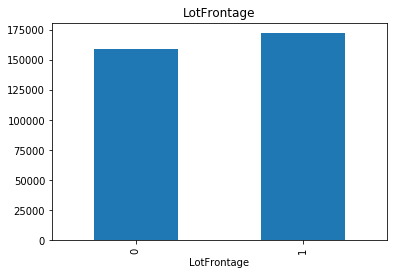

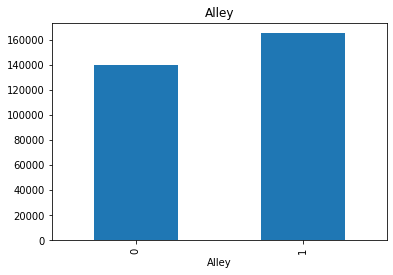

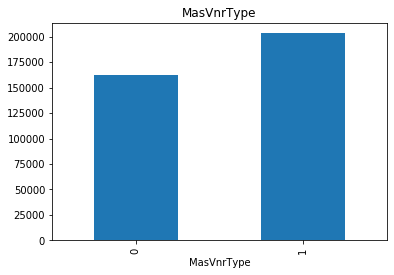

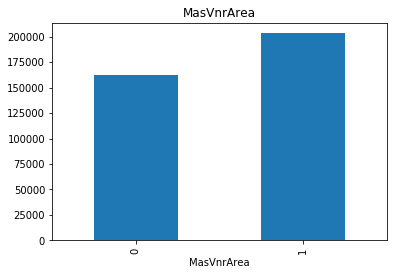

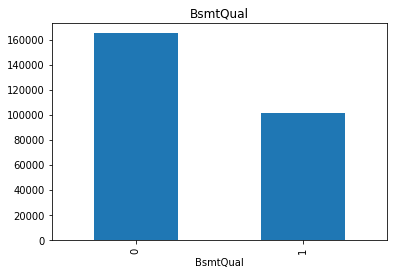

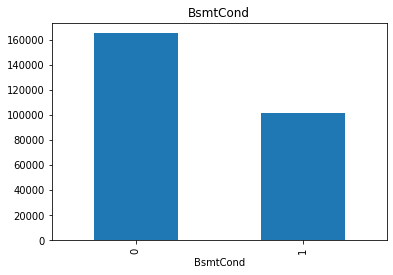

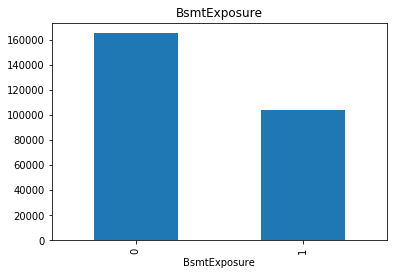

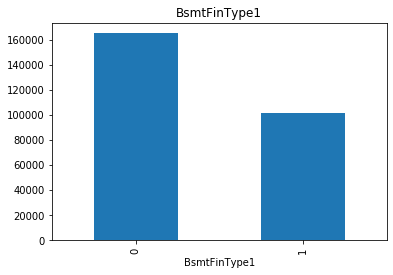

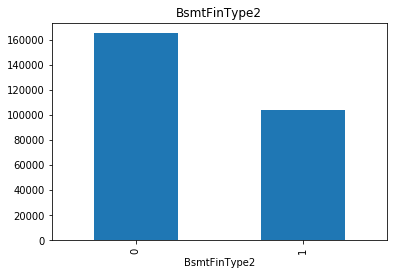

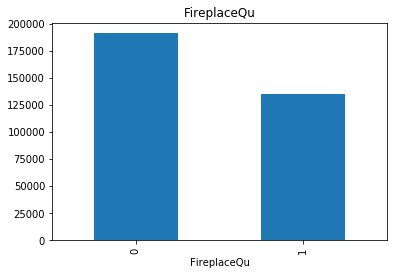

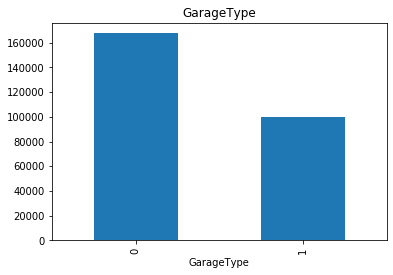

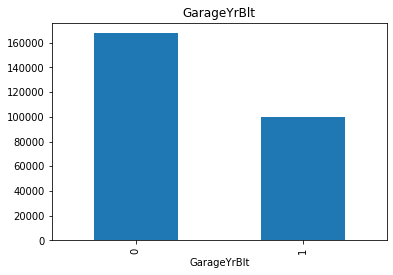

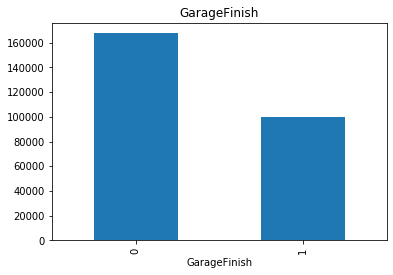

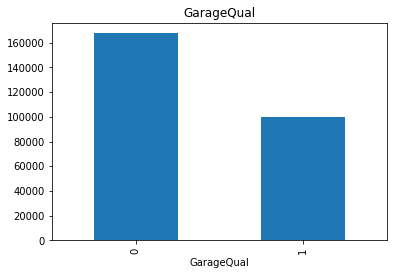

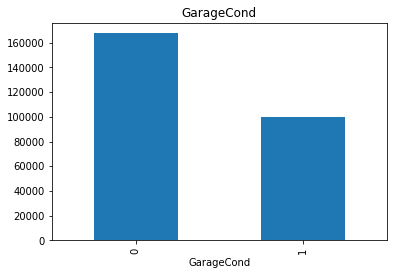

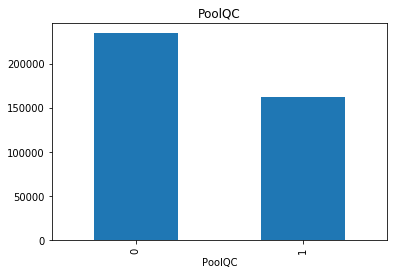

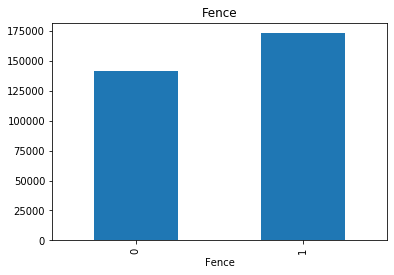

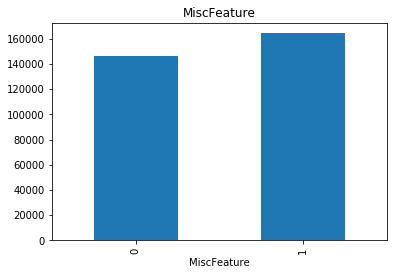

In [45]:
# lets see what difference does missing values makes
for missings in missing:
    data=df.copy()
    data[missings]=np.where(data[missings].isnull(),1,0)
    #print(data[missings])
    data.groupby(missings)['SalePrice'].median().plot.bar()
    plt.title(missings)
    plt.show()

In [51]:
numericals=[n for n in df.columns if df[n].dtypes!='O']
print(numericals)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [52]:
years=[n for n in numericals if 'Yr' in n or 'Year' in n]
print(years)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


Yearbuilt 1973.0


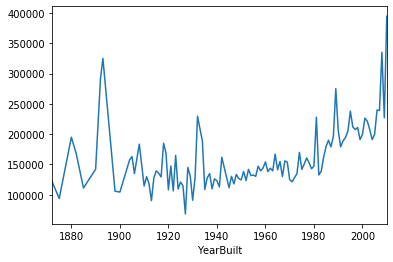

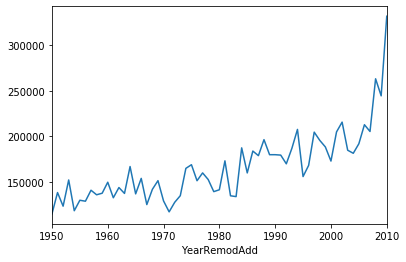

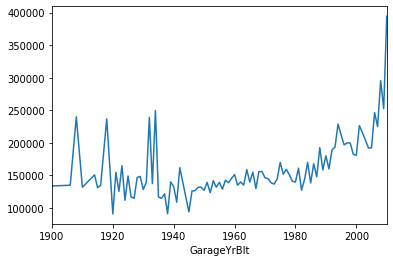

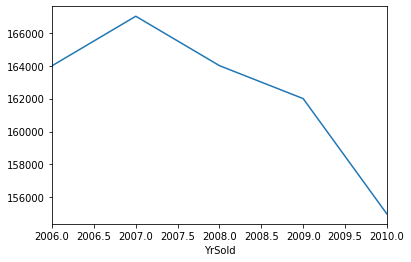

In [63]:
print('Yearbuilt',df['YearBuilt'].median())
for y in years:
    df.groupby(y)['SalePrice'].median().plot()
    plt.show()

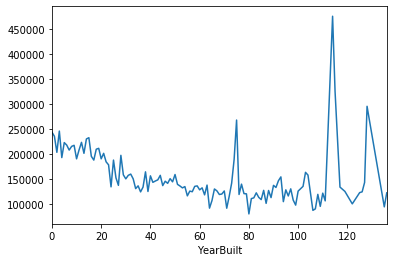

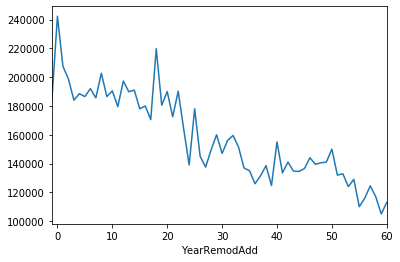

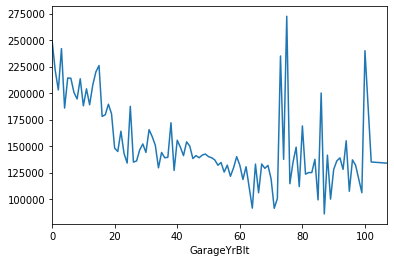

In [65]:
# here we see that all are increasing with increase in years but yrsold increases
# saleprice reduces so if we want life of house we must subtract yr sold from all years

for y in years:
    if y!='YrSold':
        data=df.copy()
        data[y]=data['YrSold']-data[y]
        data.groupby(y)['SalePrice'].median().plot()
        plt.show()
        

In [70]:
#checking for discrete variable 
discrete=[n for n in df.columns if (len(df[n].unique())<20 and n not in years)] 
print(discrete,'\n', len(discrete))

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition'] 
 56


In [72]:
df[discrete]

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,...,GarageQual,GarageCond,PavedDrive,PoolArea,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,...,TA,TA,Y,0,NaN,NaN,NaN,2,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Feedr,...,TA,TA,Y,0,NaN,NaN,NaN,5,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,...,TA,TA,Y,0,NaN,NaN,NaN,9,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Norm,...,TA,TA,Y,0,NaN,NaN,NaN,2,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,Norm,...,TA,TA,Y,0,NaN,NaN,NaN,12,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,...,TA,TA,Y,0,NaN,NaN,NaN,8,WD,Normal
1456,20,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,...,TA,TA,Y,0,NaN,MnPrv,NaN,2,WD,Normal
1457,70,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,...,TA,TA,Y,0,NaN,GdPrv,Shed,5,WD,Normal
1458,20,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,...,TA,TA,Y,0,NaN,NaN,NaN,4,WD,Normal


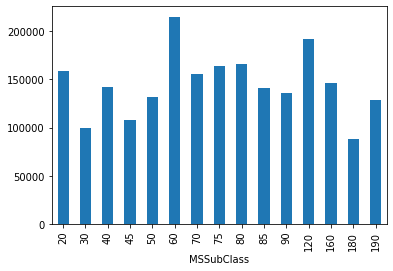

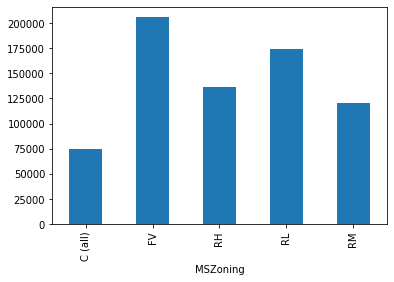

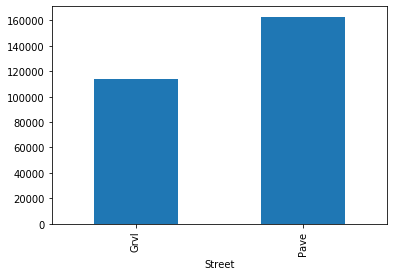

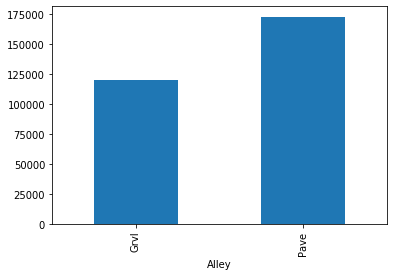

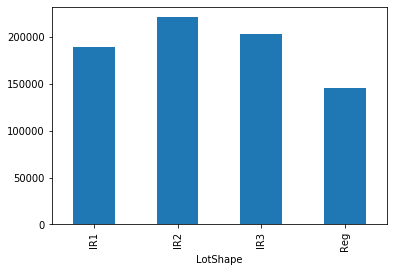

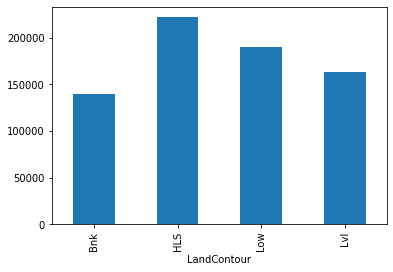

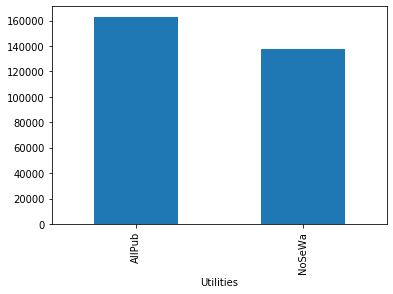

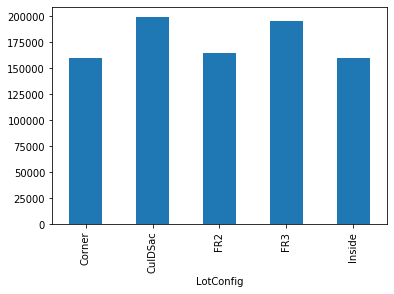

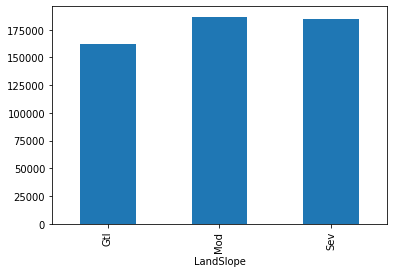

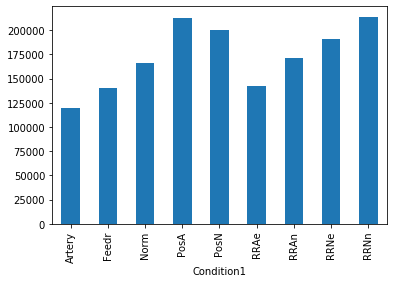

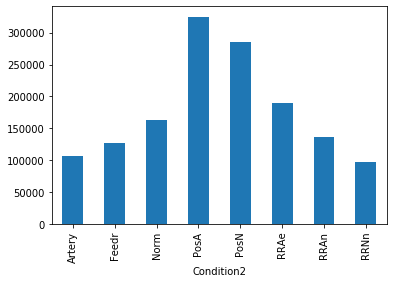

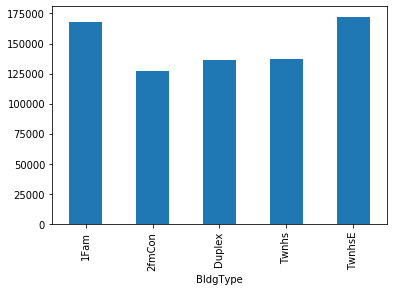

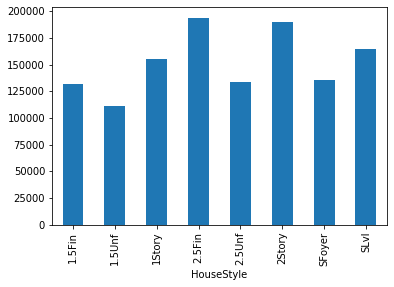

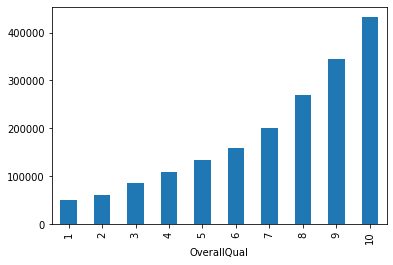

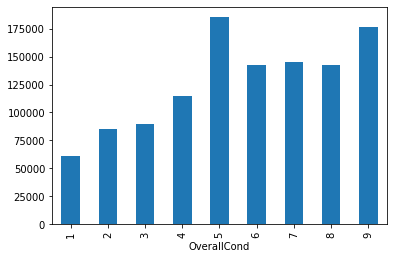

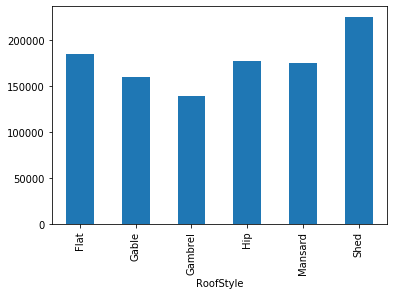

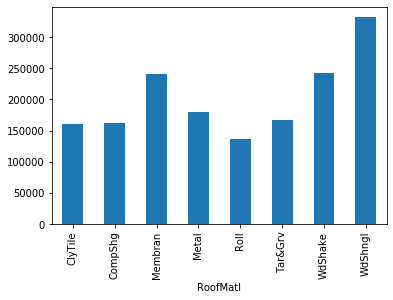

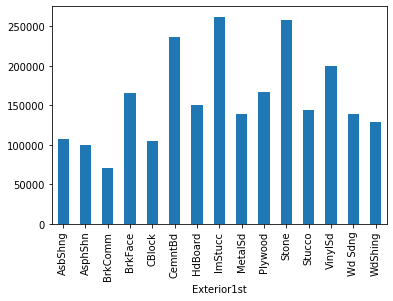

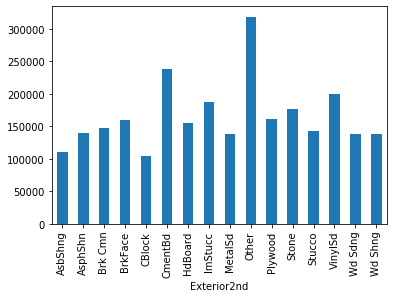

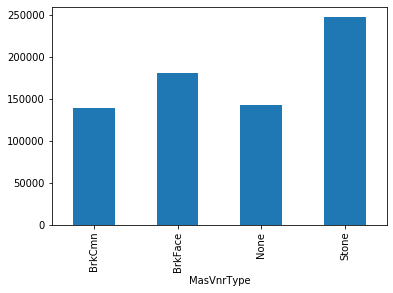

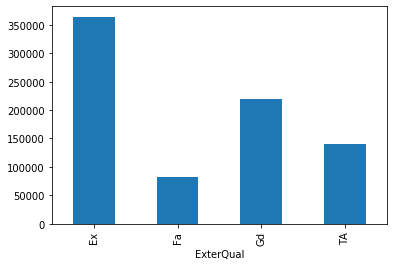

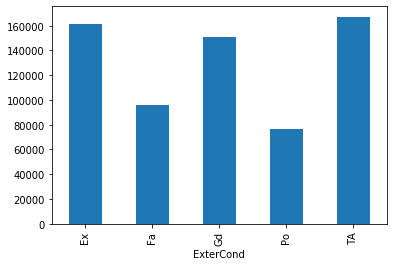

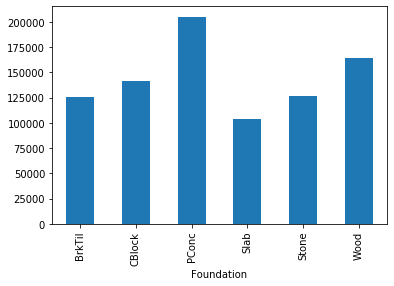

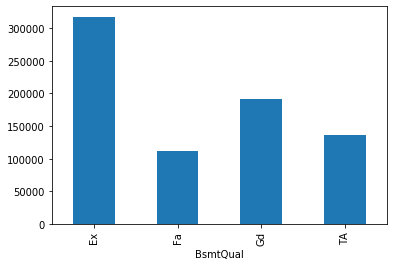

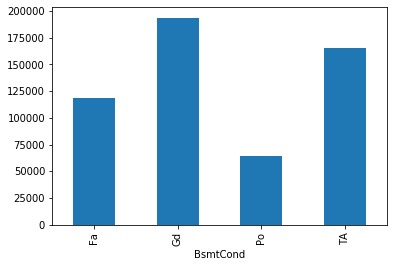

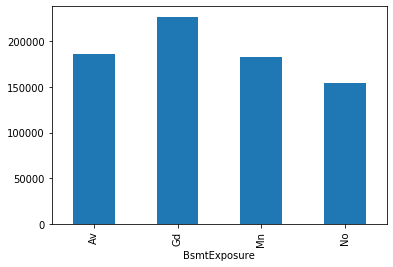

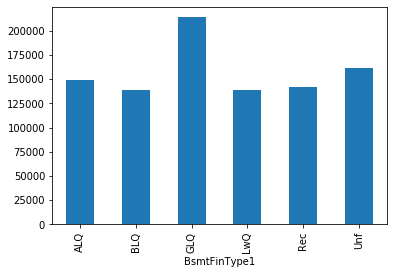

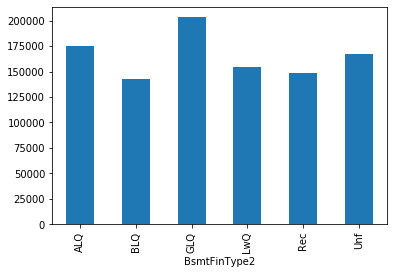

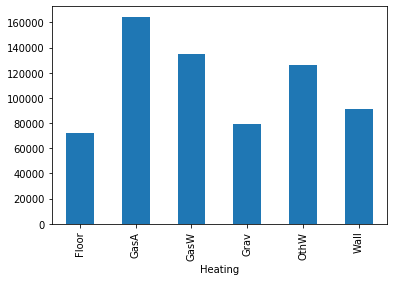

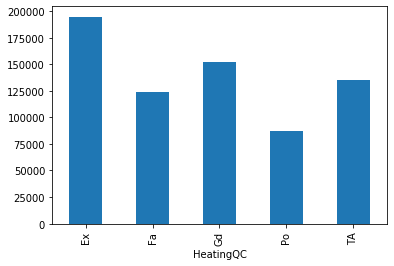

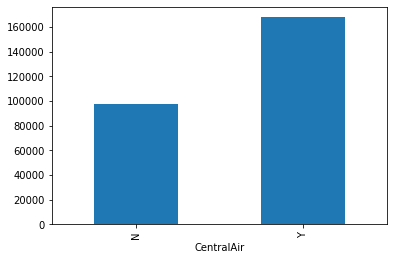

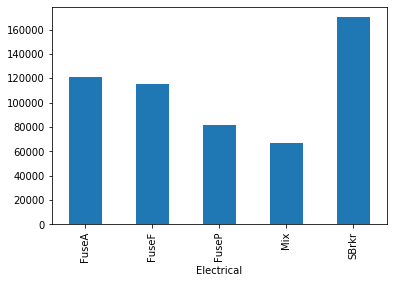

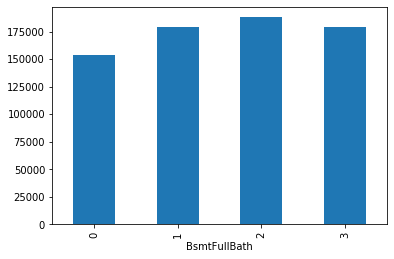

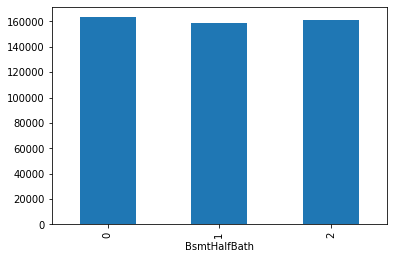

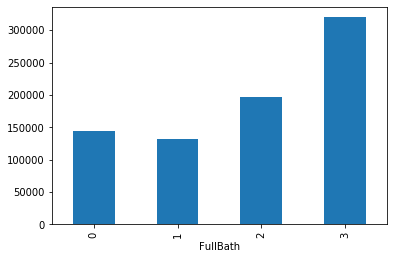

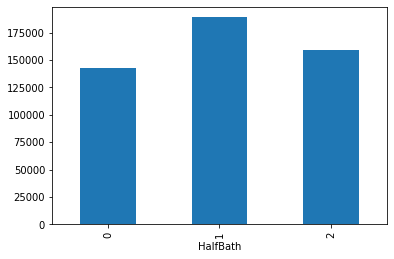

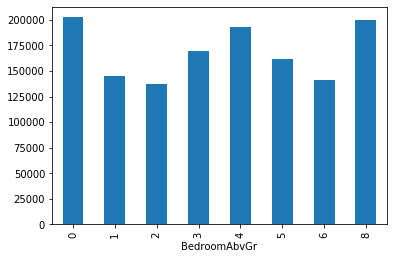

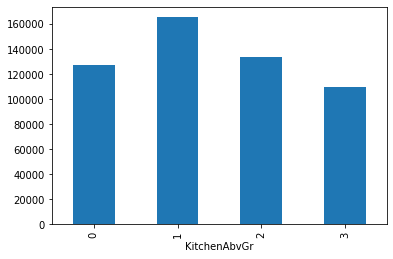

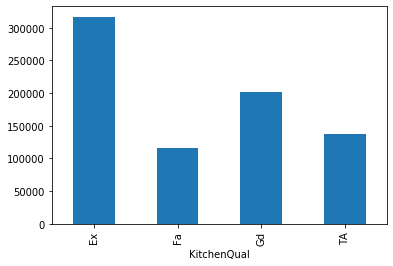

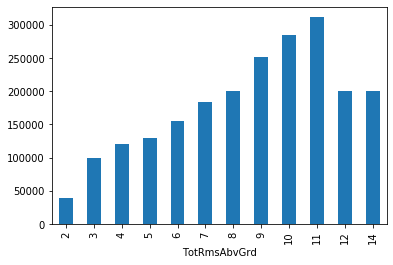

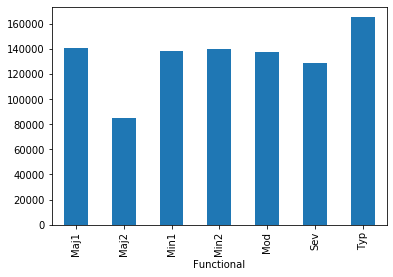

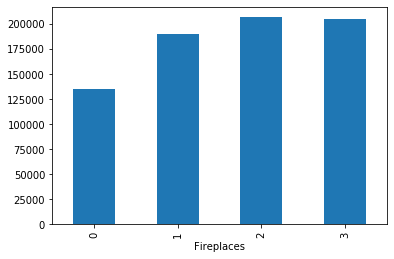

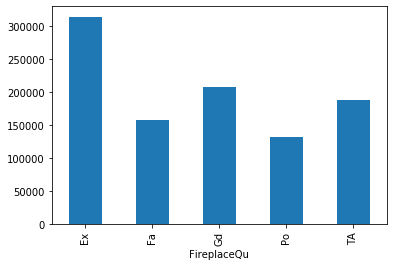

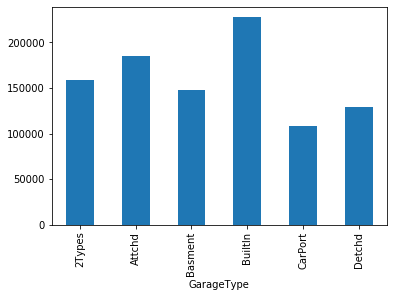

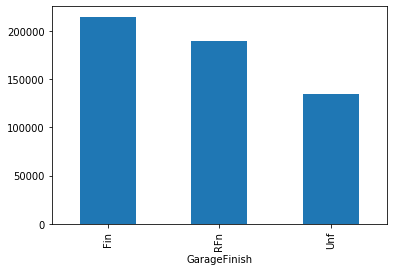

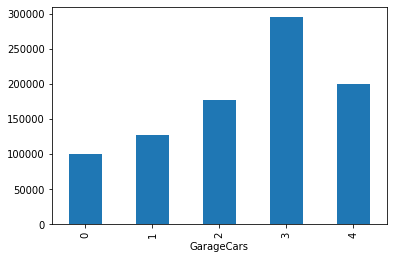

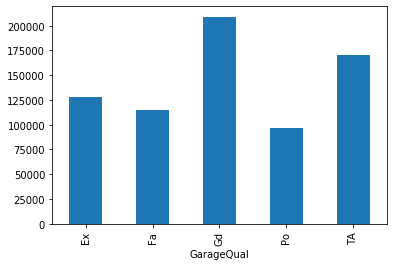

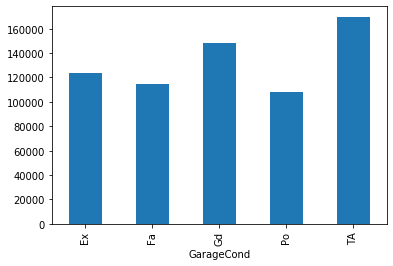

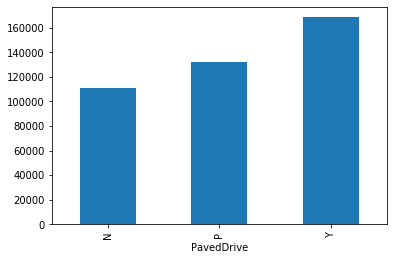

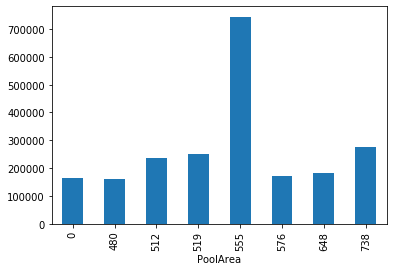

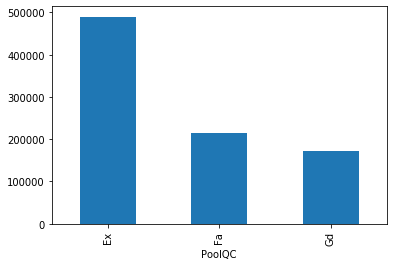

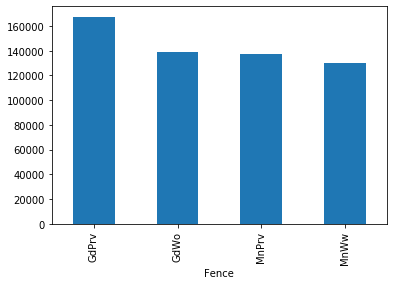

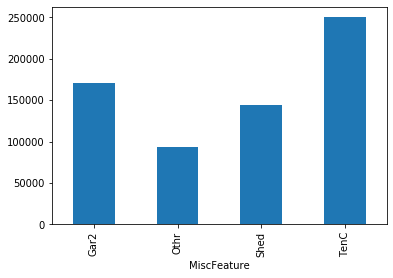

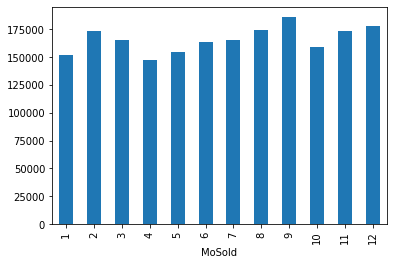

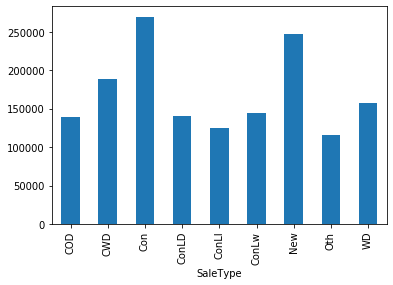

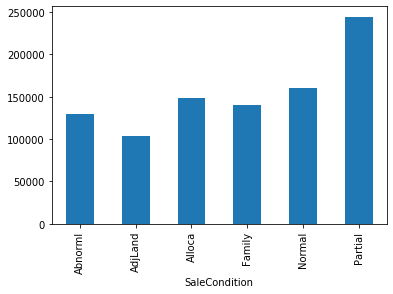

In [79]:
for d in discrete:
    df.groupby(d)['SalePrice'].median().plot.bar()
    plt.show()

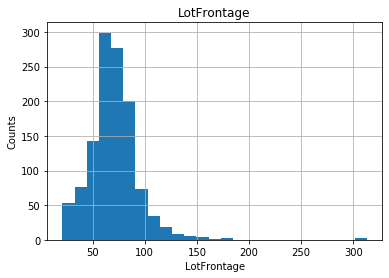

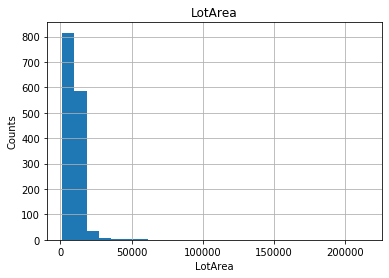

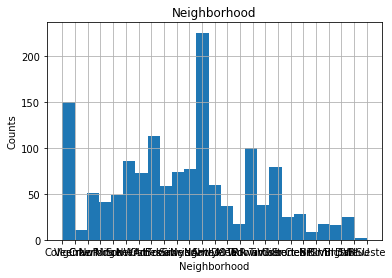

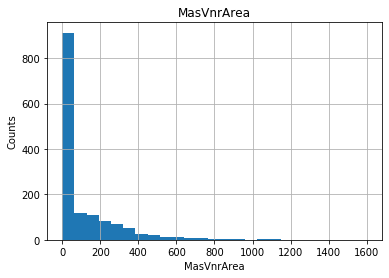

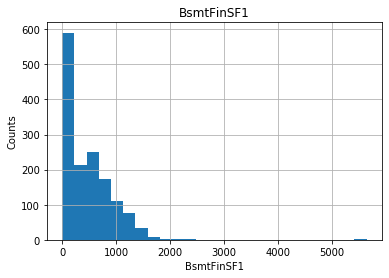

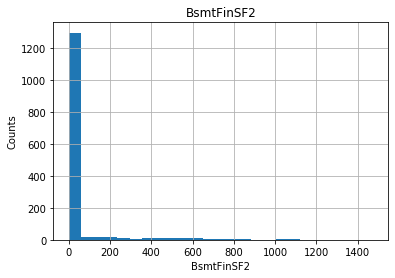

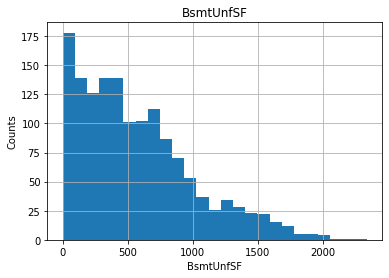

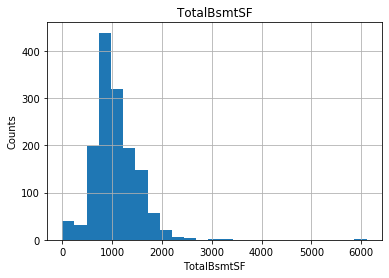

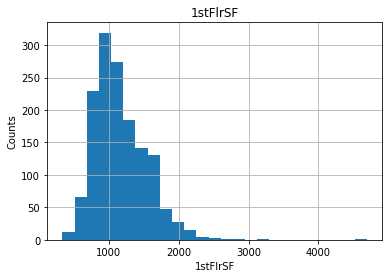

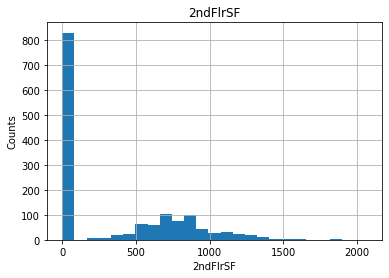

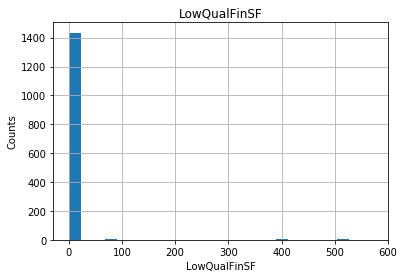

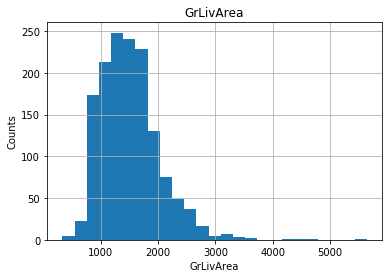

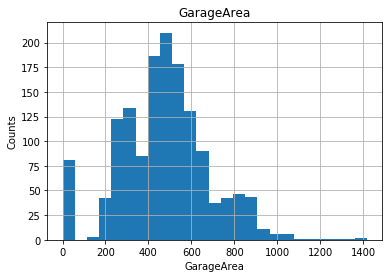

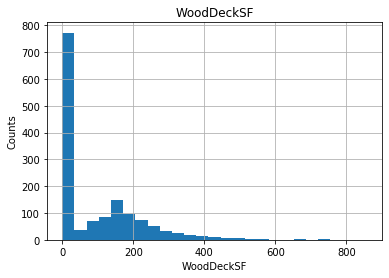

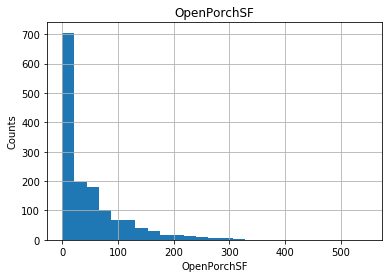

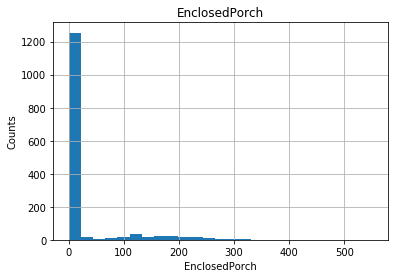

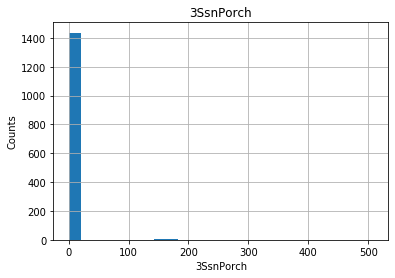

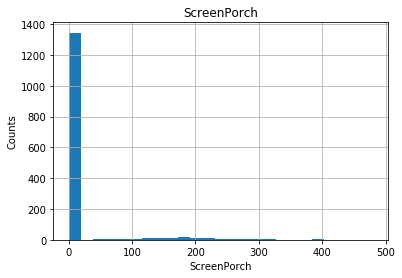

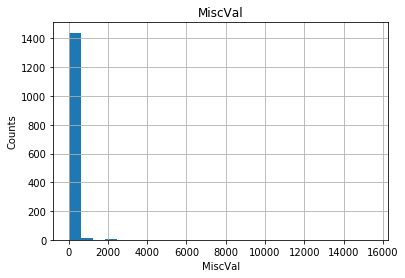

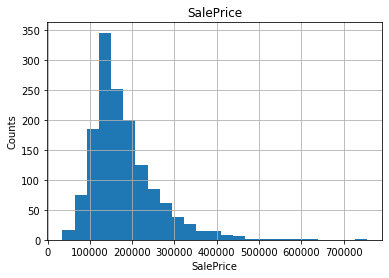

In [82]:
continuous =[n for n in df.columns if (n not in discrete and n not in years and n not in 'Id')]
for c in continuous:
    df[c].hist(bins=25)
    plt.xlabel(c)
    plt.ylabel('Counts')
    plt.title(c)
    plt.show()

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
LotFrontage 0.1773972602739726
Alley 0.9376712328767123
MasVnrType 0.005479452054794521
MasVnrArea 0.005479452054794521
BsmtQual 0.025342465753424658
BsmtCond 0.025342465753424658
BsmtExposure 0.026027397260273973
BsmtFinType1 0.025342465753424658
BsmtFinType2 0.026027397260273973
FireplaceQu 0.4726027397260274
GarageType 0.05547945205479452
GarageYrBlt 0.05547945205479452
GarageFinish 0.05547945205479452
GarageQual 0.05547945205479452
GarageCond 0.05547945205479452
PoolQC 0.9952054794520548
Fence 0.8075342465753425
MiscFeature 0.963013698630137


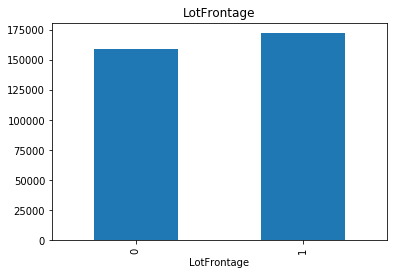

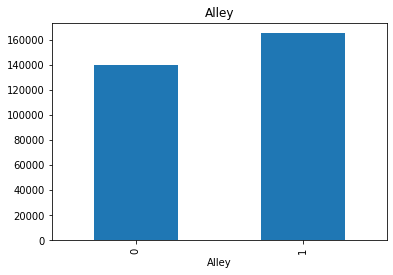

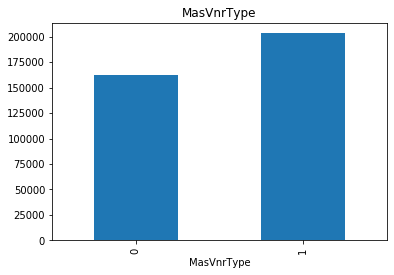

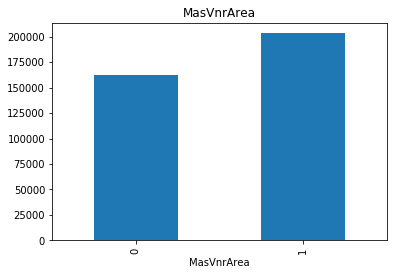

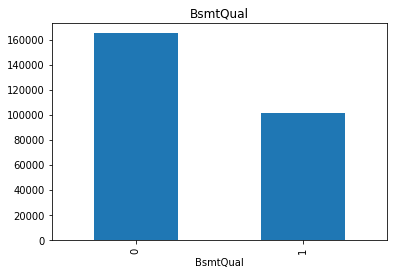

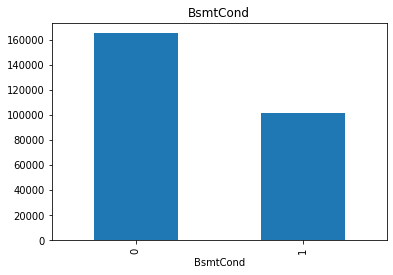

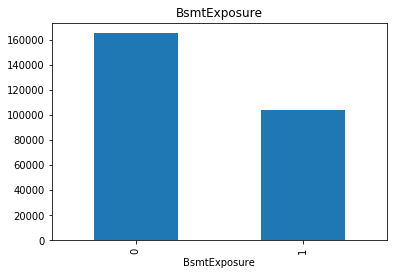

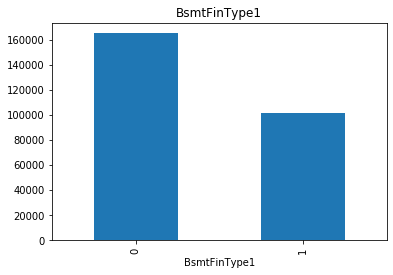

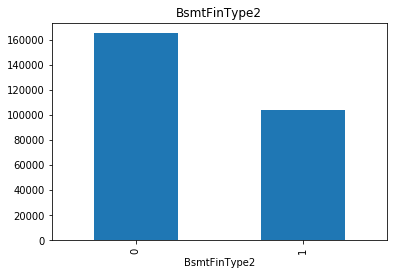

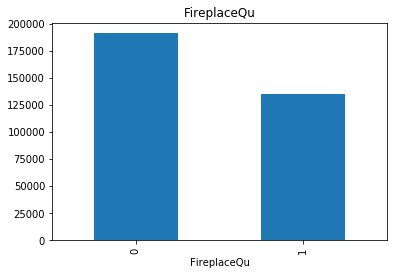

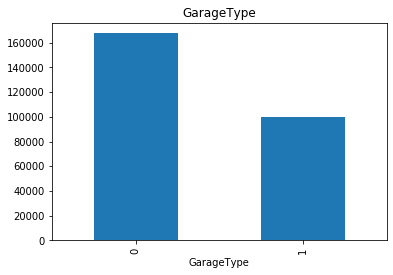

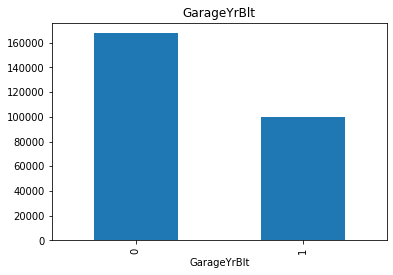

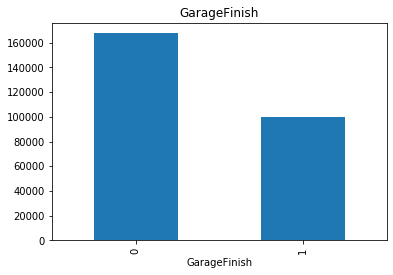

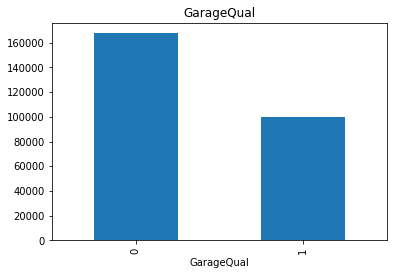

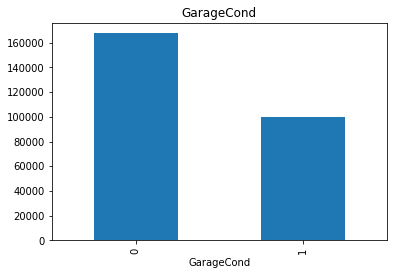

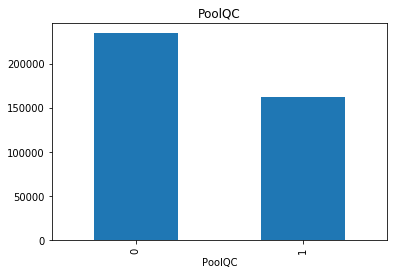

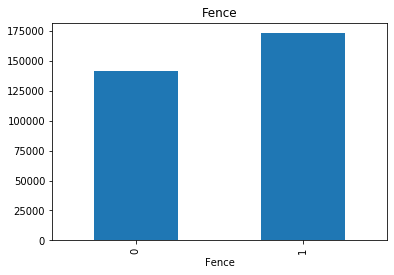

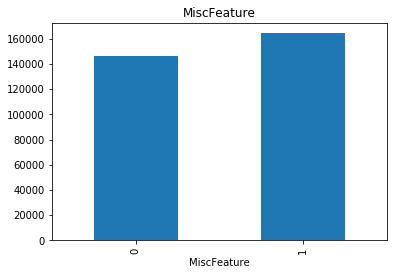

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


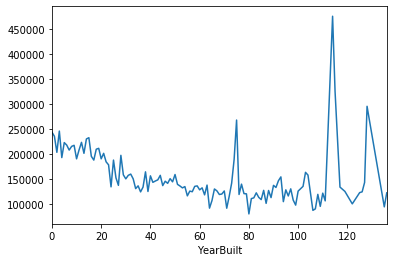

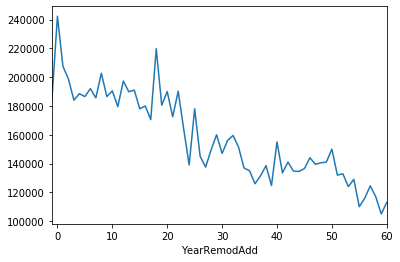

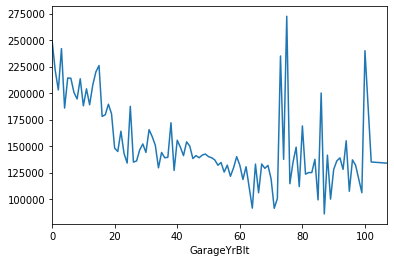

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition'] 
 56


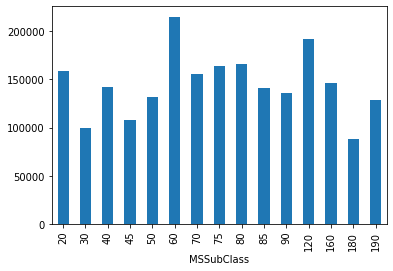

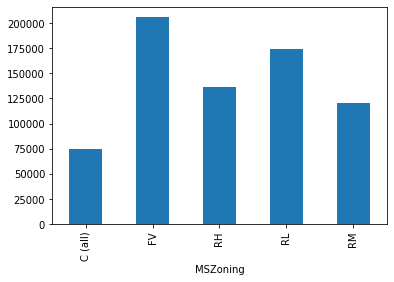

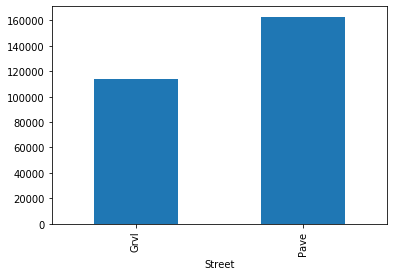

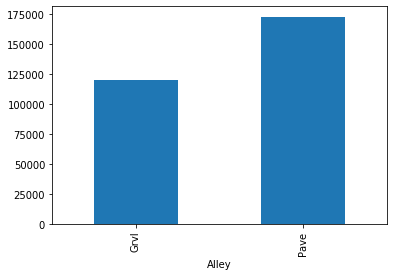

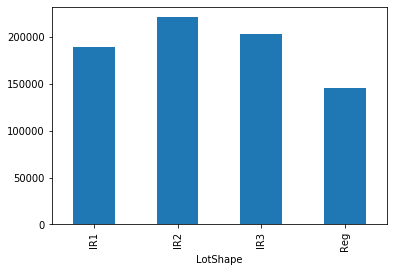

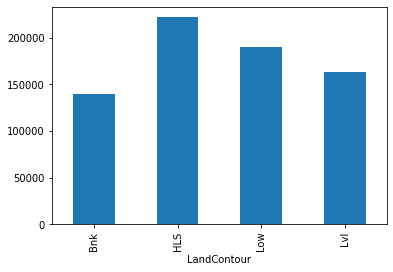

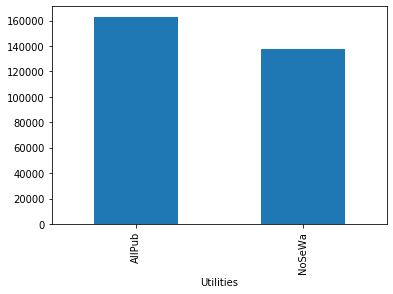

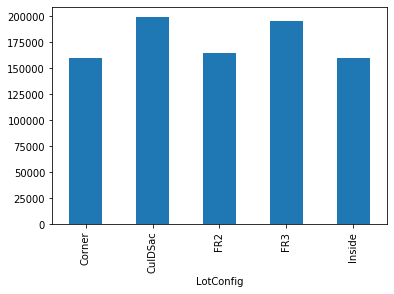

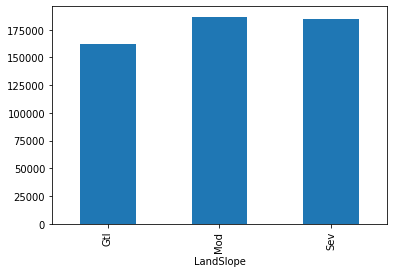

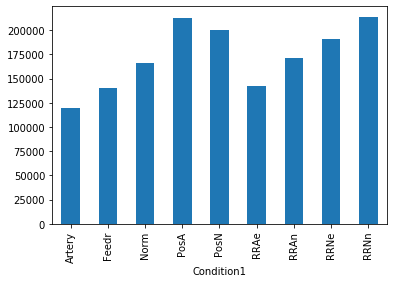

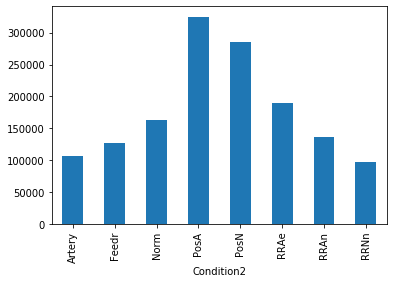

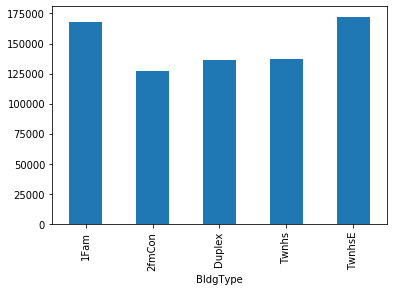

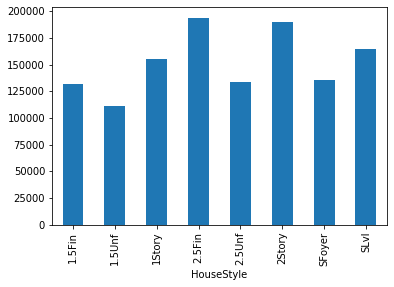

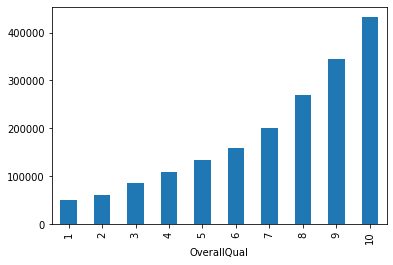

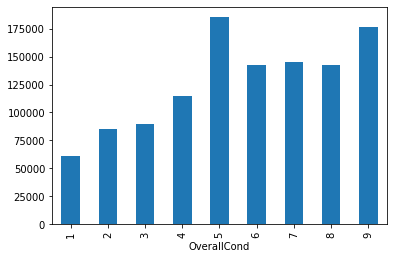

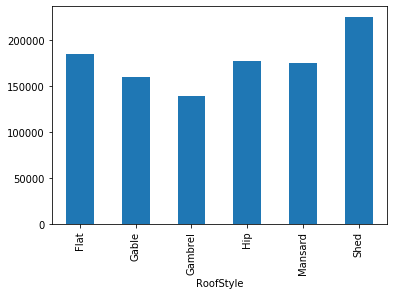

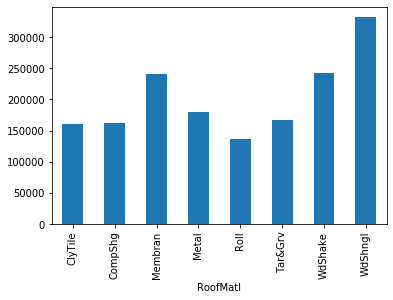

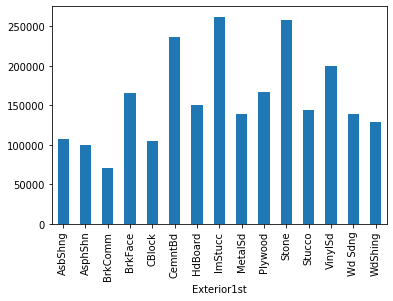

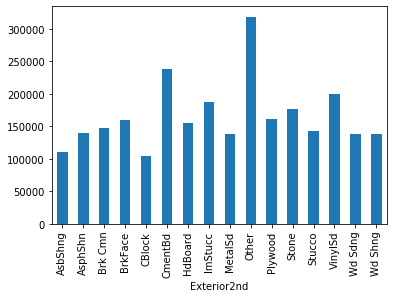

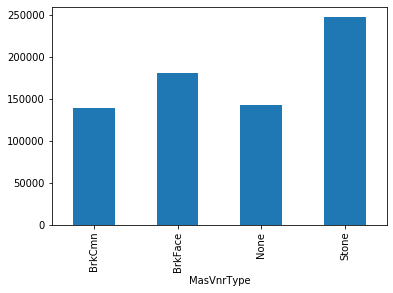

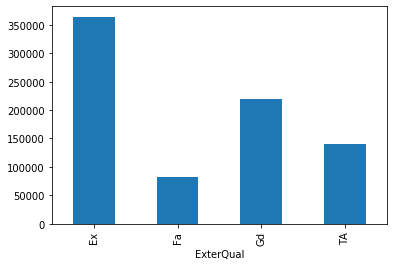

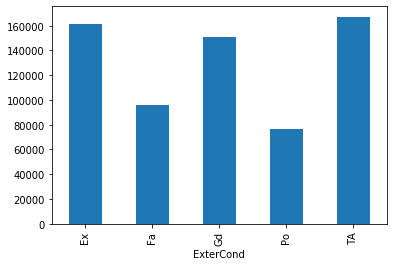

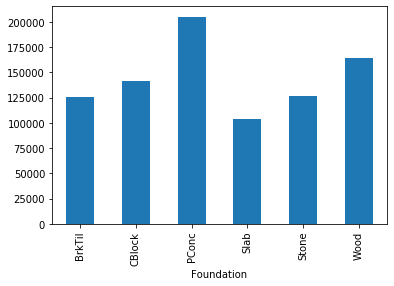

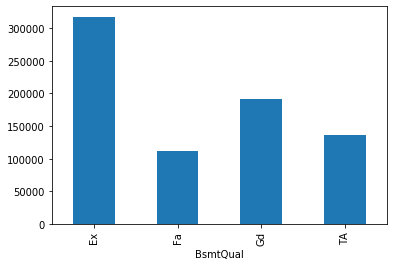

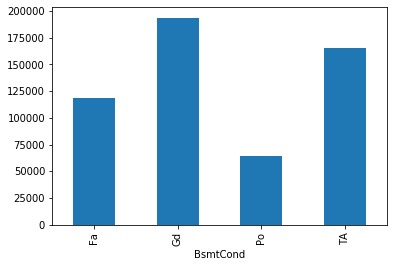

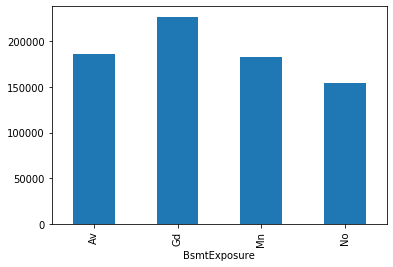

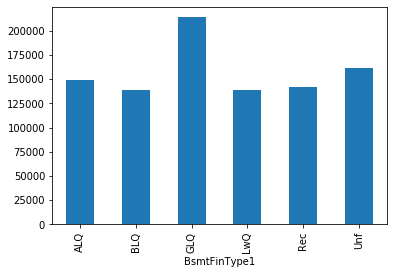

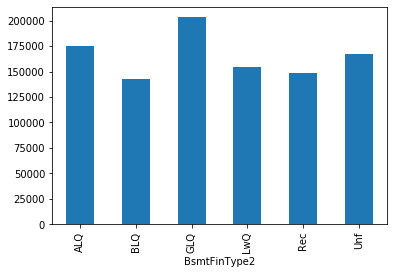

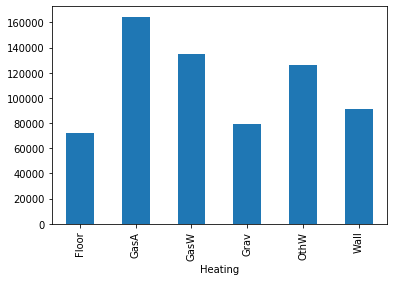

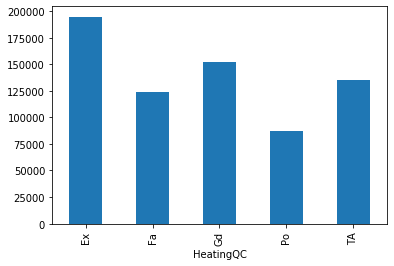

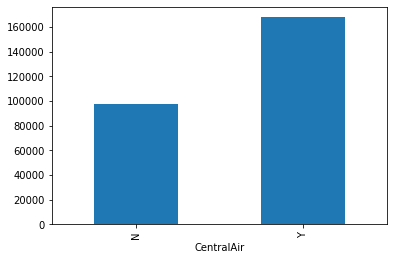

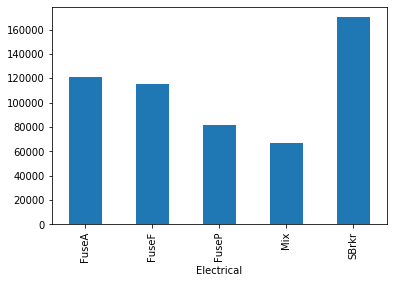

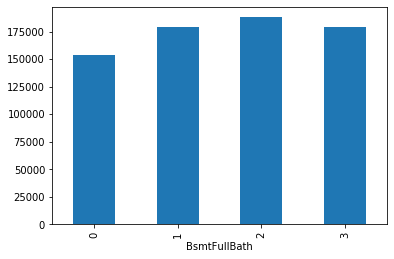

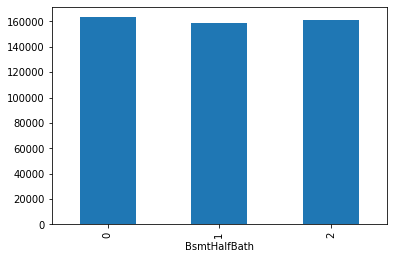

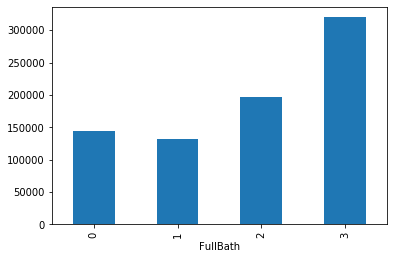

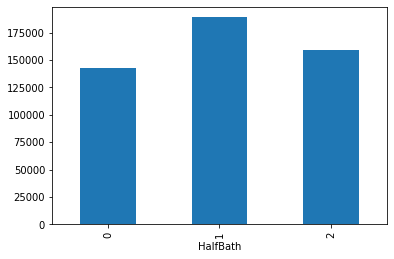

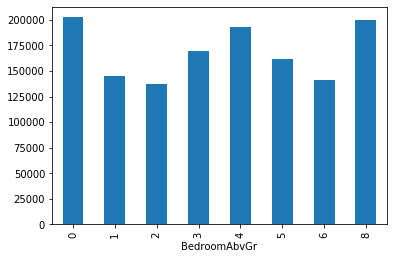

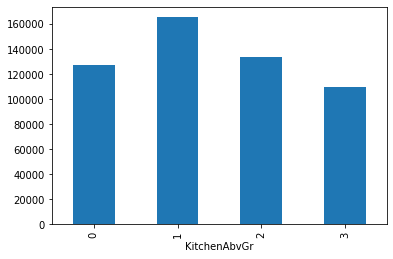

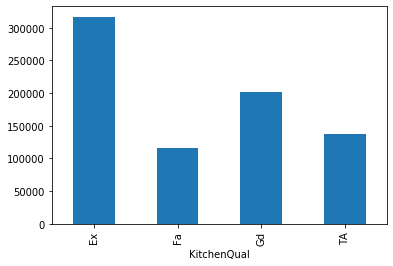

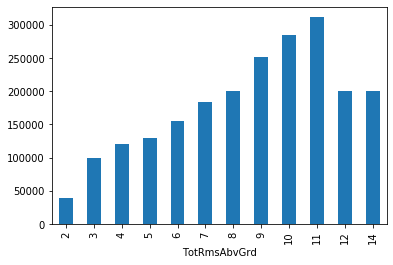

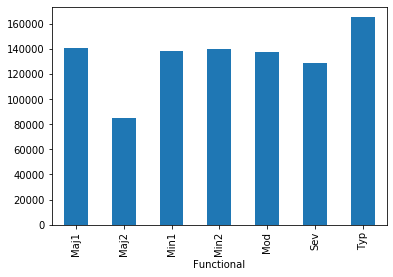

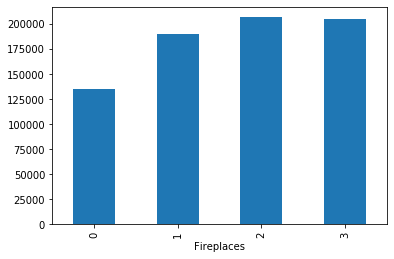

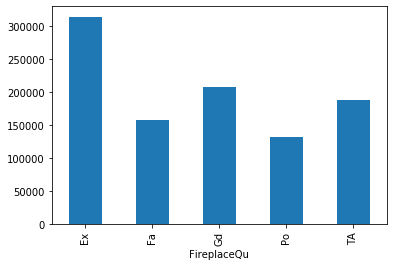

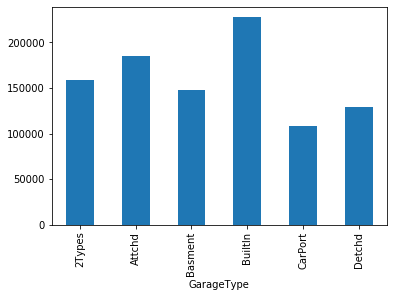

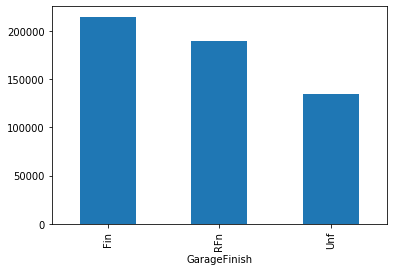

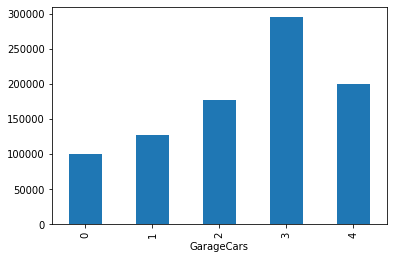

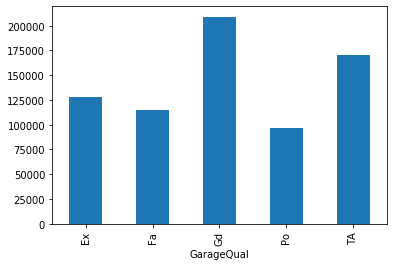

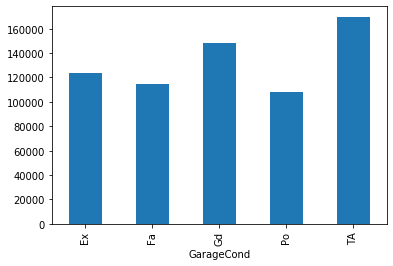

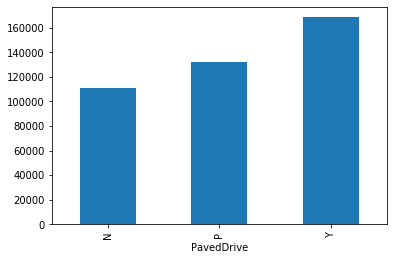

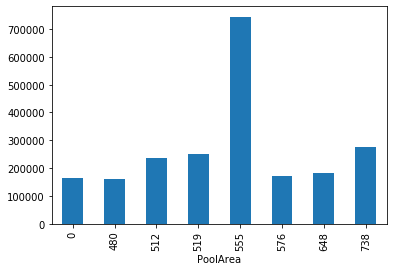

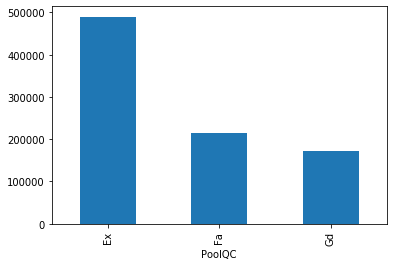

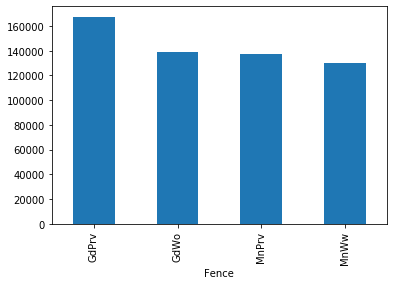

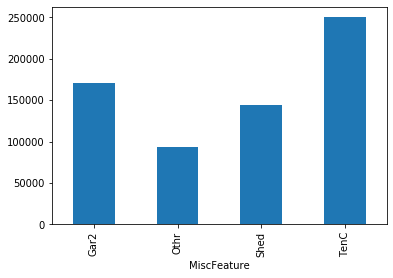

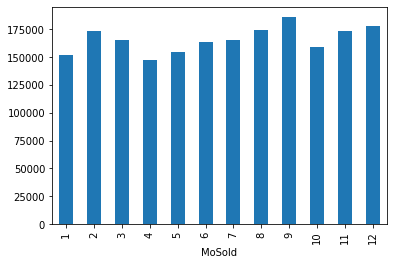

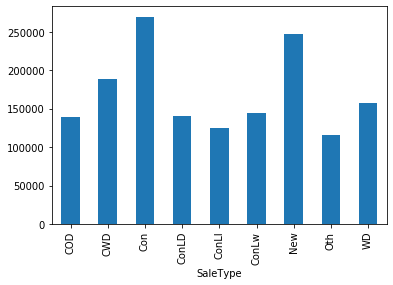

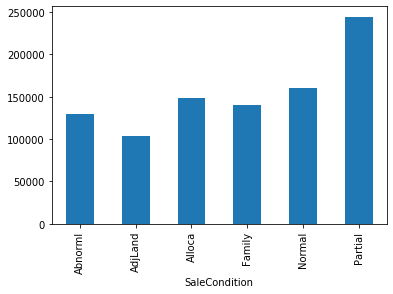

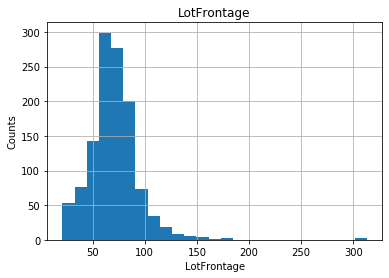

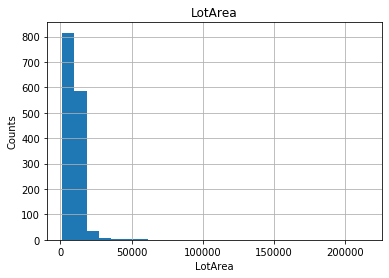

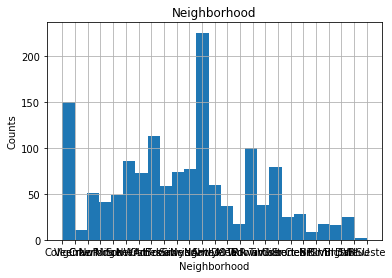

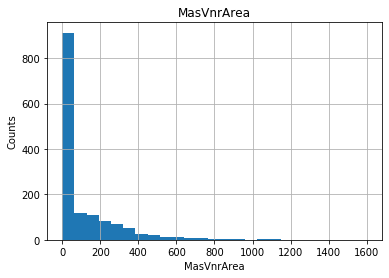

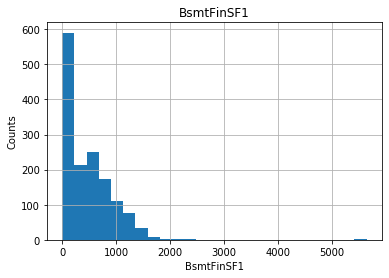

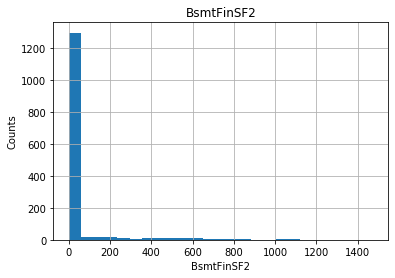

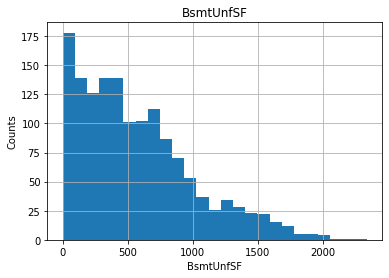

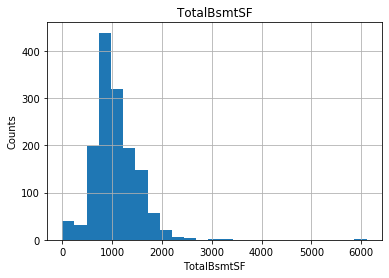

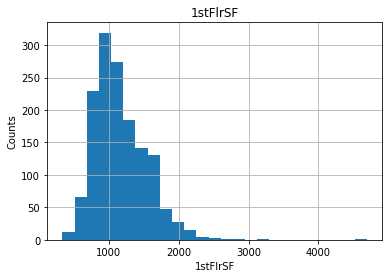

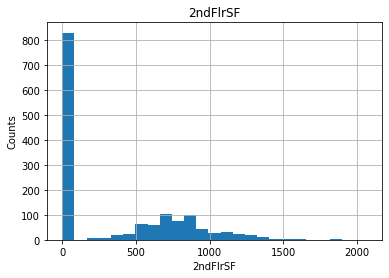

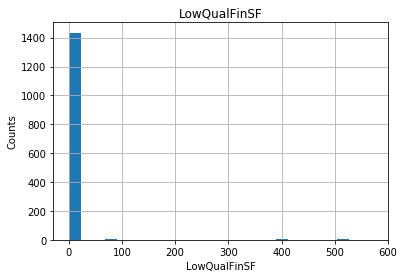

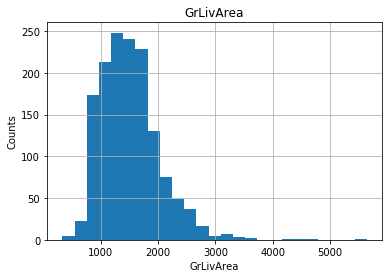

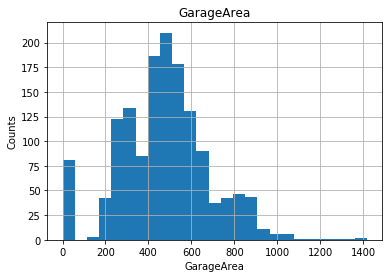

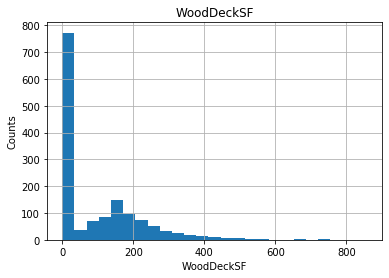

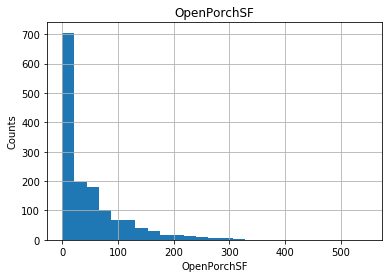

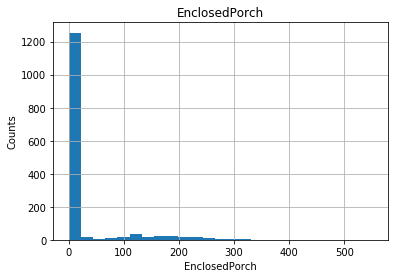

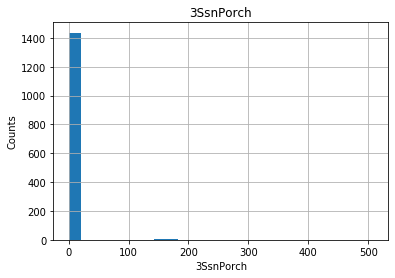

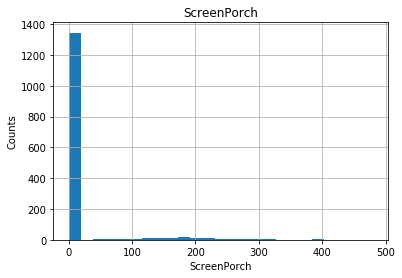

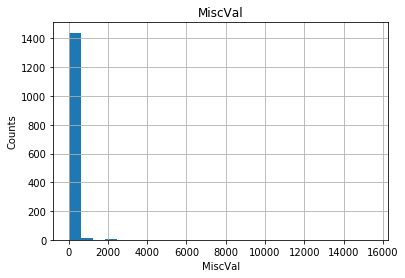

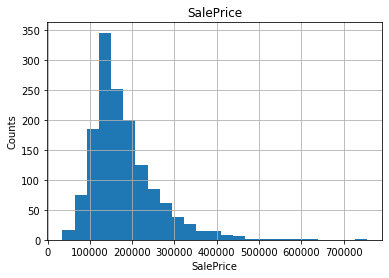

In [84]:
def data(df):
    df2=df.copy()
    missing=[features for features in df.columns if df[features].isnull().sum()>1]
    print(missing)
    for missings in missing:
        print(missings,df[missings].isnull().mean())
    
    for missings in missing:
        data=df.copy()
        data[missings]=np.where(data[missings].isnull(),1,0)
        #print(data[missings])
        data.groupby(missings)['SalePrice'].median().plot.bar()
        plt.title(missings)
        plt.show()

    years=[n for n in numericals if 'Yr' in n or 'Year' in n]
    print(years)
    for y in years:
        if y!='YrSold':
            data=df.copy()
            data[y]=data['YrSold']-data[y]
            data.groupby(y)['SalePrice'].median().plot()
            plt.show()

    discrete=[n for n in df.columns if (len(df[n].unique())<20 and n not in years)] 
    print(discrete,'\n', len(discrete))
    for d in discrete:
        df.groupby(d)['SalePrice'].median().plot.bar()
        plt.show()

    continuous =[n for n in df.columns if (n not in discrete and n not in years and n not in 'Id')]
    for c in continuous:
        df[c].hist(bins=25)
        plt.xlabel(c)
        plt.ylabel('Counts')
        plt.title(c)
        plt.show()

data(df)
    